In [151]:
import pandas as pd
import dateutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
df = pd.read_csv('Created CSVs/all_seins_all_data_standard_dates.csv').drop('Unnamed: 0', axis=1)

In [153]:
df = df[['Date', '# Hauls', 'Common Name', 'Quantity']]

In [154]:
df = df.dropna()

In [155]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [156]:
set(df[df["# Hauls"].str.contains(r'\d') == False]['# Hauls'])

{'?', 'Many', 'unknown'}

In [157]:
df = df[df["# Hauls"].str.contains(r'\d') == True]

In [158]:
import re
hauls = []
for haul in df['# Hauls']:
    first_num  = re.search(r'\d+', haul).group()
    hauls.append(first_num)

In [159]:
df['# Hauls'] = [int(x) for x in hauls]

In [160]:
df = df.replace(to_replace=['TMTC','Too Many To Count'], value= '30')

In [161]:
df = df.replace(to_replace="unknown", value= np.nan).dropna()

In [162]:
quants = []
for quant in df['Quantity']:
    first_num  = re.search(r'\d+', quant).group()
    quants.append(first_num)

In [163]:
df['Quantity'] = [int(x) for x in quants]

In [164]:
df['Common Name'] = [str(x) for x in df['Common Name']]

In [165]:
hauls = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(1))

In [166]:
dates = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(0))

In [167]:
hauls_df = df.groupby(['Date', '# Hauls'], as_index=False).sum()

In [168]:
hauls_data = hauls_df[['# Hauls', 'Quantity']]

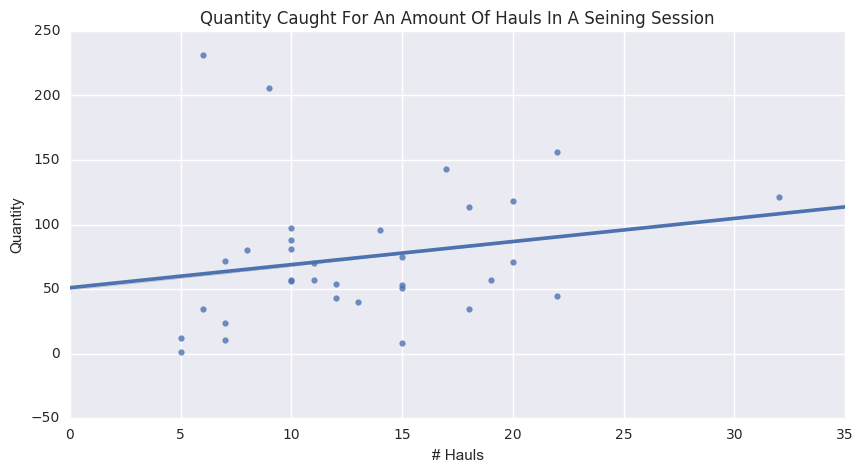

In [169]:
ax = sns.regplot(x="# Hauls", y="Quantity", ci = False,data=hauls_df)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session")

In [170]:
# ditch comb jellies

In [171]:
df['Common Name'] = [x.lower() for x in list(df['Common Name'])]

In [172]:
name_changes = {'ctenophore':'comb jelly','comb jellies ctenophores': 'comb jelly', 'comb jellies': 'comb jelly', '20 ctenophores': 'comb jelly'}

In [173]:
df = df.replace(name_changes)

In [174]:
df_no_jellies = df[df['Common Name'] != 'comb jelly']

In [175]:
hauls_df = df_no_jellies.groupby(['Date', '# Hauls'], as_index=False).sum()

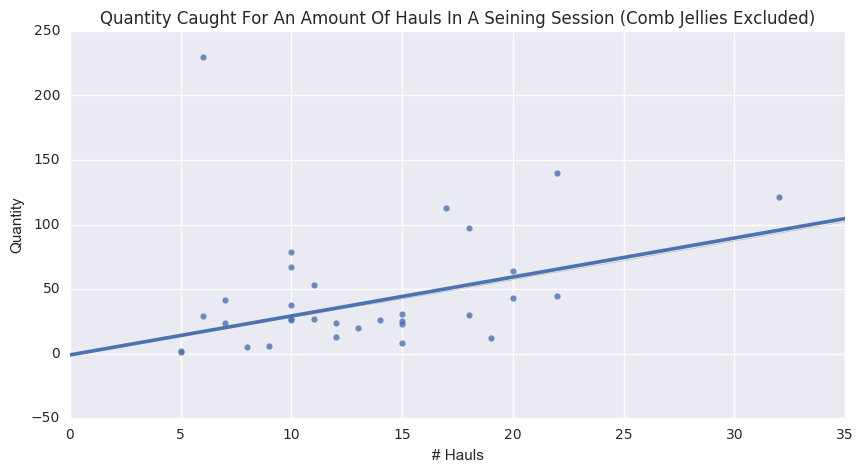

In [176]:
ax = sns.regplot(x="# Hauls", y="Quantity", data=hauls_df, order = 1, ci = False, robust = True)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)")

In [177]:
df["Year"] = df["Date"].dt.year
df_no_jellies["Year"] = df_no_jellies["Date"].dt.year

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [178]:
df_by_year = df.groupby("Year", as_index=False).sum()
df_no_jellies_by_year = df_no_jellies.groupby("Year", as_index=False).sum()

In [179]:
df_no_jellies_by_year["Catch Per Unit Effort"] =  df_no_jellies_by_year["Quantity"] / df_no_jellies_by_year["# Hauls"]

In [180]:
df_by_year["Catch Per Unit Effort"] = df_by_year["Quantity"] / df_by_year["# Hauls"]

In [181]:
sns.set()

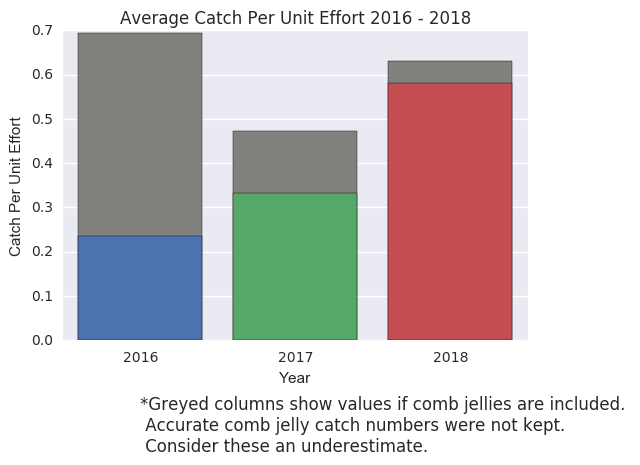

In [199]:
#df, df_no_jellies
ax = sns.barplot(x="Year", y="Catch Per Unit Effort", data=df_by_year,color = 'yellow',saturation =0.01)
ax = sns.barplot(x="Year", y="Catch Per Unit Effort", data=df_no_jellies_by_year, saturation = 1)
ax.set_title('Average Catch Per Unit Effort 2016 - 2018')
ax.text(0,-0.25,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Recent Average Catch Per Haul (comb jelly shadows)', bbox_inches='tight')

In [183]:
# number of species caught

In [184]:
#df

In [185]:
#name_corrected_df = pd.read_csv('Created CSVs/Combined_Name_Corrected_All_Seins.csv')

In [186]:
#name_corrected_df['Date'] =  [dateutil.parser.parse(date) for date in list(name_corrected_df['Date'])]

In [187]:
dates = list(set(df['Date']))

In [188]:
species_count_dict = {}
for date in dates:
    species_count_dict[date] = df[df["Date"] == date].shape[0]

In [189]:
df["Species_Count"] = [species_count_dict[x] for x in df['Date']]

In [190]:
hauls_species_df = df.groupby(['Date', '# Hauls', 'Species_Count'], as_index=False).sum()

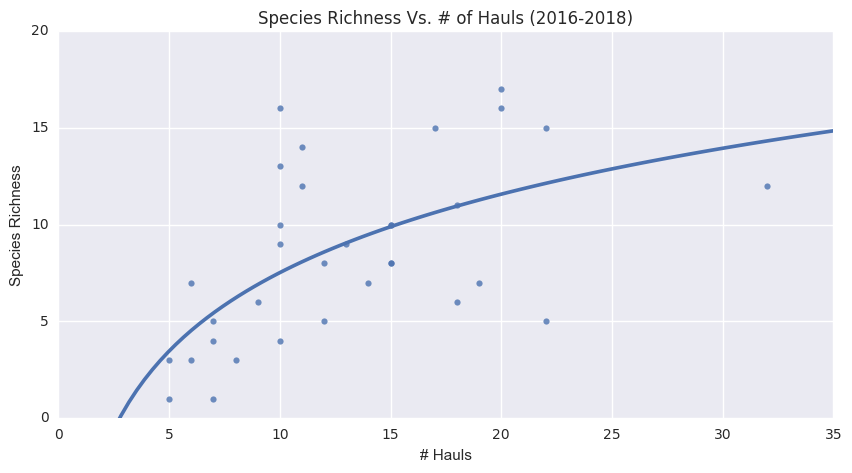

In [224]:
ax = sns.regplot(x="# Hauls", y="Species_Count", data=hauls_species_df, ci = None, logx =True)
ax.set_title("Species Richness Vs. # of Hauls (2016-2018)")
ax.set_ylim(0)
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.set_ylabel('Species Richness')
ax.figure.savefig("Graphs/Number of Species Caught For Amount of Hauls In A Seining Session")

In [192]:
# Every 6 seins leads to 4 new species

In [193]:
# 2 fish per haul, 2 new species per 3 hauls

In [194]:
df["Year"] = df['Date'].dt.year

In [196]:
df.groupby(["Year"], as_index=False).mean()

,Year,# Hauls,Quantity,Species_Count
0,2016,13.700000,9.500000,9.111111
1,2017,14.030000,6.640000,11.840000
2,2018,16.522222,10.433333,11.444444


In [197]:
df["Species Richness Per Haul"] = 1.0*df["Species_Count"]/df["# Hauls"] 